# Angel Fernando García Núñez
# Clasificación de trazos de numeros

## Modulos

Importando PyTorch para calculo tensorial, NumPy para algebra lineal y Matplotlib para graficar

In [135]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Dataset

Importando dataset de scikit-learn

In [136]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',version=1,parser='auto')
x,y=mnist['data'],mnist['target']

Función para graficar 15 imagenes random del Dataset y sus etiquetas asignadas

In [137]:
import random

def plotTest(xx,yy,loc):
    r,c=3,5
    fig=plt.figure(figsize=(2*c,2*r))
    for _r in range(r):
        for _c in range(c):
            plt.subplot(r,c,_r*c+_c+1)
            ix=random.randint(0,len(xx)-1)
            img=xx.loc[ix+loc]
            plt.imshow(img.values.reshape(28,28),cmap='gray')
            plt.axis("off")
            plt.title(yy[ix])
    plt.tight_layout()
    plt.show()

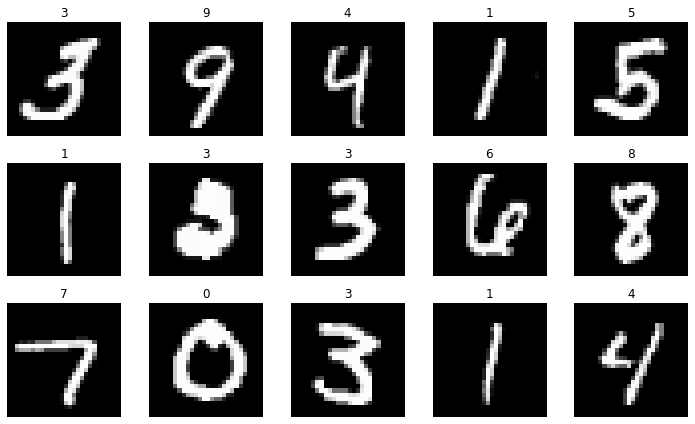

In [138]:
plotTest(x,y,0)

## Datos de entrenamiento

Extracción y normalización de los datos de entrenamiento

In [139]:
xt=np.array(x[:60000]/255.)
yt=np.array(y[:60000].astype(np.compat.long))

In [140]:
xt=torch.from_numpy(np.array(xt)).float()
yt=torch.from_numpy(np.array(yt)).long()

# Implementación con calculo tensorial

Modelación e implementación de la red neuronal con calculo tensorial

## Modelo

Definición de las capas del modelo

In [141]:
d0,d1,d2=784,100,10

w1=torch.tensor(
    np.random.normal(loc=0.0,scale=np.sqrt(2/(d0+d1)),size=(d0,d1)),
    requires_grad=True,dtype=torch.float)

b1=torch.zeros(d1,requires_grad=True,dtype=torch.float)

w2=torch.tensor(
    np.random.normal(loc=0.0,scale=np.sqrt(2/(d1+d2)),size=(d1,d2)),
    requires_grad=True,dtype=torch.float)

b2=torch.zeros(d2,requires_grad=True,dtype=torch.float)

## Funciones de optimización y de error

In [142]:
def softmax(t):
    return torch.exp(t)/torch.exp(t).sum(axis=-1,keepdims=True)

def cross_entropy(out,tag):
    logs=out[torch.arange(len(out)),tag]
    loss=-logs+torch.log(torch.sum(torch.exp(out),axis=-1))
    return loss.mean()

## Evaluación del modelo

In [143]:
def evaluate(t):
    h=t.mm(w1)+b1
    h_relu=h.clamp(min=0)
    yp=h_relu.mm(w2)+b2
    return yp

def prediction(t):
    yp=evaluate(t)
    return torch.argmax(yp,axis=1)

## Entrenamiento

In [144]:
ap=0.8

l=[]
ep=100
for e in range(1,ep+1):
    yp=evaluate(xt)
    
    loss=cross_entropy(yp,yt)
    l.append(loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w1-=ap*w1.grad
        b1-=ap*b1.grad
        w2-=ap*w2.grad
        b2-=ap*b2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
        
    if not e%10:
        print(f'Iteracion: {e}/{ep}, Error: {loss:.5f}')
    

Iteracion: 10/100, Error: 1.11215
Iteracion: 20/100, Error: 0.67874
Iteracion: 30/100, Error: 0.38903
Iteracion: 40/100, Error: 0.35053
Iteracion: 50/100, Error: 0.30994
Iteracion: 60/100, Error: 0.33297
Iteracion: 70/100, Error: 0.26636
Iteracion: 80/100, Error: 0.25102
Iteracion: 90/100, Error: 0.23894
Iteracion: 100/100, Error: 0.22853


## Minimización del error

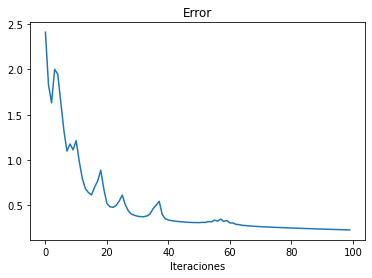

In [145]:
plt.plot(l)
plt.title('Error')
plt.xlabel('Iteraciones')
plt.show()

## Datos de prueba

Extracción y normalización de los datos de prueba

In [146]:
xtest=np.array(x[60000:]/255.)
ytest=np.array(y[60000:].astype(np.compat.long))

In [147]:
xtest=torch.from_numpy(np.array(xtest)).float()
ytest=torch.from_numpy(np.array(ytest)).long()

## Predicción

Predicción del modelo en los datos de prueba

In [148]:
yp=prediction(xtest)

## Exactitud del modelo

In [149]:
from sklearn.metrics import accuracy_score

ex=accuracy_score(ytest,yp)
print(f'Exactitud: {ex} : {ex*100:.2f}%')

Exactitud: 0.938 : 93.80%


## Clasificación

Clasificación de los datos de prueba con el modelo

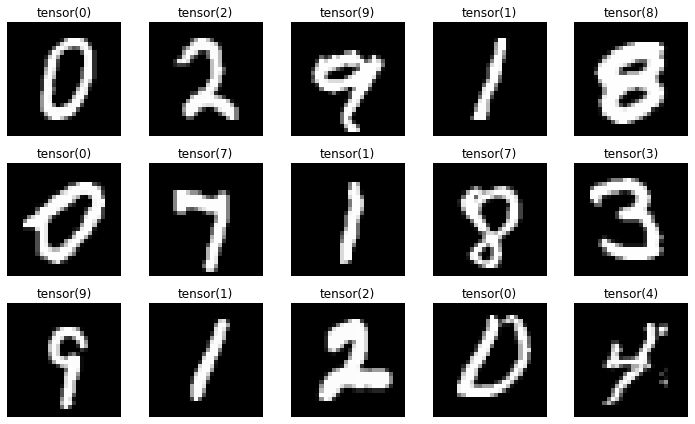

In [151]:
xtest=x[60000:]
plotTest(xtest,yp,60000)

# Implementación de forma explicita

Modelación e implementación de las capas de la red neuronal de forma explicita por medio del paquete torch.nn

## Modelo

Definición de las capas del modelo

In [152]:
d0,d1,d2=784,100,10

model=torch.nn.Sequential(
    torch.nn.Linear(d0,d1),
    torch.nn.ReLU(),
    torch.nn.Linear(d1,d2),
    torch.nn.ReLU())

## Entrenamiento

In [153]:
model.train()

ap=0.8

l=[]
ep=100
for e in range(1,ep+1):
    yp=model(xt)
    
    loss=cross_entropy(yp,yt)
    l.append(loss.item())
    
    model.zero_grad()
    
    loss.backward()
    
    with torch.no_grad():
        for p in model.parameters():
            p-=ap*p.grad
        
    if not e%10:
        print(f'Iteracion: {e}/{ep}, Error: {loss:.5f}')
    

Iteracion: 10/100, Error: 1.91569
Iteracion: 20/100, Error: 1.00217
Iteracion: 30/100, Error: 0.60458
Iteracion: 40/100, Error: 0.46731
Iteracion: 50/100, Error: 0.37078
Iteracion: 60/100, Error: 0.37310
Iteracion: 70/100, Error: 0.30261
Iteracion: 80/100, Error: 0.28120
Iteracion: 90/100, Error: 0.26660
Iteracion: 100/100, Error: 0.25426


## Minimización del error

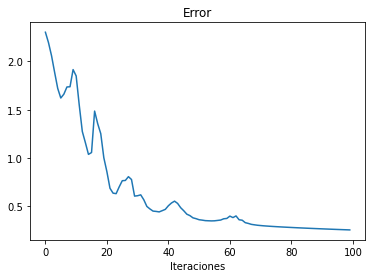

In [154]:
plt.plot(l)
plt.title('Error')
plt.xlabel('Iteraciones')
plt.show()

## Datos de prueba

Extracción y normalización de los datos de prueba

In [155]:
xtest=np.array(x[60000:]/255.)
ytest=np.array(y[60000:].astype(np.compat.long))

In [156]:
xtest=torch.from_numpy(np.array(xtest)).float()
ytest=torch.from_numpy(np.array(ytest)).long()

## Predicción

Predicción del modelo en los datos de prueba

In [157]:
model.eval()
yp=softmax(model(xtest))
yp=torch.argmax(yp,axis=1)

## Exactitud del modelo

In [158]:
from sklearn.metrics import accuracy_score

ex=accuracy_score(ytest,yp)
print(f'Exactitud: {ex} : {ex*100:.2f}%')

Exactitud: 0.9288 : 92.88%


## Clasificación

Clasificación de los datos de prueba con el modelo

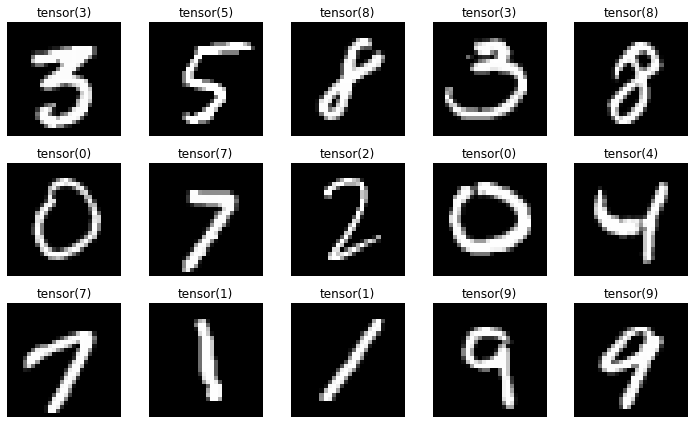

In [159]:
xtest=x[60000:]
plotTest(xtest,yp,60000)

# Implementación de optimización explicita

Modelación e implementación de las capas de la red neuronal y funciones de optimización de forma explicita por medio del paquete torch.nn

## Modelo

Definición de las capas del modelo

In [187]:
d0,d1,d2=784,100,10

model=torch.nn.Sequential(
    torch.nn.Linear(d0,d1),
    torch.nn.ReLU(),
    torch.nn.Linear(d1,d2),
    torch.nn.ReLU())

## Funciones de optimización y de error

In [188]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.8)

## Entrenamiento

In [189]:
model.train()

l=[]
ep=100
for e in range(1,ep+1):
    yp=model(xt)
    
    loss=criterion(yp,yt)
    l.append(loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
        
    if not e%10:
        print(f'Iteracion: {e}/{ep}, Error: {loss:.5f}')
    

Iteracion: 10/100, Error: 1.46339
Iteracion: 20/100, Error: 0.93687
Iteracion: 30/100, Error: 0.46783
Iteracion: 40/100, Error: 0.39603
Iteracion: 50/100, Error: 0.45032
Iteracion: 60/100, Error: 0.31404
Iteracion: 70/100, Error: 0.29432
Iteracion: 80/100, Error: 0.29478
Iteracion: 90/100, Error: 0.27366
Iteracion: 100/100, Error: 0.25083


## Minimización del error

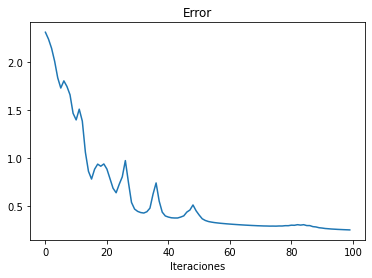

In [190]:
plt.plot(l)
plt.title('Error')
plt.xlabel('Iteraciones')
plt.show()

## Datos de prueba

Extracción y normalización de los datos de prueba

In [191]:
xtest=np.array(x[60000:]/255.)
ytest=np.array(y[60000:].astype(np.compat.long))

In [192]:
xtest=torch.from_numpy(np.array(xtest)).float()
ytest=torch.from_numpy(np.array(ytest)).long()

## Predicción

Predicción del modelo en los datos de prueba

In [193]:
model.eval()
yp=softmax(model(xtest))
yp=torch.argmax(yp,axis=1)

## Exactitud del modelo

In [194]:
from sklearn.metrics import accuracy_score

ex=accuracy_score(ytest,yp)
print(f'Exactitud: {ex} : {ex*100:.2f}%')

Exactitud: 0.9307 : 93.07%


## Clasificación

Clasificación de los datos de prueba con el modelo

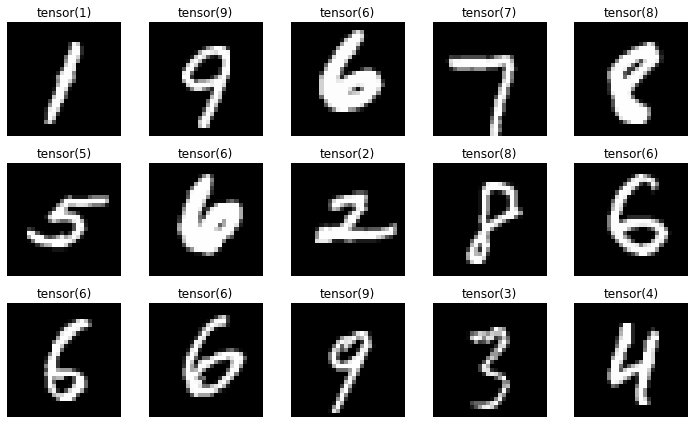

In [196]:
xtest=x[60000:]
plotTest(xtest,yp,60000)